### Download Historical Data About Various Coins

In [1]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                   \
Ticker       ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD   
Date                                                                    
2016-01-01       NaN         NaN    434.334015       NaN          NaN   
2016-01-02       NaN         NaN    433.437988       NaN          NaN   
2016-01-03       NaN         NaN    430.010986       NaN          NaN   
2016-01-04       NaN         NaN    433.091003       NaN          NaN   
2016-01-05       NaN         NaN    431.959991       NaN          NaN   
...              ...         ...           ...       ...          ...   
2025-01-01  0.917592  706.512939  94419.757812  7.028347  3353.504150   
2025-01-02  0.961345  705.678589  96886.875000  7.168960  3451.392578   
2025-01-03  1.090376  713.643555  98107.429688  7.747455  3605.009766   
2025-01-04  1.071400  713.841187  98236.226562  7.684382  3657.706787   
2025-01-05  1.077515  707.620056  97614.796875  7.553882  3610.583252   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-01  0.473435  193.873734  2.322341  0.917592  706.512939  ...   
2025-01-02  0.482731  207.767044  2.403370  0.961345  705.678589  ...   
2025-01-03  0.518211  217.747330  2.452896  1.090376  713.643555  ...   
2025-01-04  0.523265  216.622925  2.419595  1.071400  713.841187  ...   
2025-01-05  0.512607  213.989609  2.352697  1.077515  707.620056  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-01  189.266922  2.080121  9.260951e+08  1.420235e+09  24519888919   
2025-01-02  193.872131  2.322408  1.199917e+09  1.880665e+09  46009564411   
2025-01-03  207.767609  2.403375  2.503147e+09  1.822244e+09  35611391163   
2025-01-04  217.748047  2.452897  1.175731e+09  1.524500e+09  22342608078   
2025-01-05  216.648636  2.419994  1.114206e+09  1.435816e+09  19749851136   

Price                                                                         
Ticker          DOT-USD       ETH-USD  MATIC-USD       SOL-USD       XRP-USD  
Date                                                                          
2016-01-01          NaN           NaN        NaN           NaN           NaN  
2016-01-02          NaN           NaN        NaN           NaN           NaN  
2016-01-03          NaN           NaN        NaN           NaN           NaN  
2016-01-04          NaN           NaN        NaN           NaN           NaN  
2016-01-05          NaN           NaN        NaN           NaN           NaN  
...                 ...           ...        ...           ...           ...  
2025-01-01  231933496.0  1.419541e+10  5955693.0  2.324232e+09  7.677226e+09  
2025-01-02  288205887.0  2.224357e+10  6527970.0  4.230330e+09  8.345904e+09  
2025-0

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [3]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-04 16:00:00,97767.90000000,98334.40000000,97630.29000000,98191.00000000,0.79645000,2025-01-04 19:59:59.999,78006.61123730,198,0.27854000,27251.65203610,0
2025-01-04 20:00:00,98312.74000000,98700.00000000,98200.21000000,98337.49000000,1.32787000,2025-01-04 23:59:59.999,130772.60849600,462,0.67680000,66661.40703740,0
2025-01-05 00:00:00,98325.25000000,98376.94000000,98049.16000000,98162.87000000,1.06607000,2025-01-05 03:59:59.999,104735.83607390,323,0.47481000,46649.64940610,0


In [4]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-04 16:00:00,98191.00,3630.00,1.07240,711.5500,2.42270,7.675,0.5158,215.65
2025-01-04 20:00:00,98337.49,3656.50,1.06940,711.3000,2.41810,7.693,0.5141,216.71
2025-01-05 00:00:00,98162.87,3635.63,1.05450,712.1400,2.38770,7.593,0.5184,217.97
2025-01-05 04:00:00,98409.70,3634.74,1.09430,708.5000,2.39860,7.653,0.5133,216.53


In [5]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-04 16:00:00,0.005045,0.005869,0.006193,0.002889,0.007067,-0.001561,-0.000194,0.004986
2025-01-04 20:00:00,0.001492,0.007300,-0.002797,-0.000351,-0.001899,0.002345,-0.003296,0.004915
2025-01-05 00:00:00,-0.001776,-0.005708,-0.013933,0.001181,-0.012572,-0.012999,0.008364,0.005814
2025-01-05 04:00:00,0.002514,-0.000245,0.037743,-0.005111,0.004565,0.007902,-0.009838,-0.006606


### Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [57]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [58]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [59]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-04 16:00:00,0.156250,0.218750,-0.156250,0.093750,-0.093750,-0.21875,0.03125,-0.03125
2025-01-04 20:00:00,0.093750,0.218750,-0.156250,0.156250,-0.218750,-0.09375,-0.03125,0.03125
2025-01-05 00:00:00,0.156250,0.218750,-0.218750,0.093750,-0.156250,-0.03125,-0.09375,0.03125
2025-01-05 04:00:00,0.031250,0.218750,-0.218750,-0.031250,-0.156250,-0.09375,0.15625,0.09375


In [60]:
def get_strat_1_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_ret = get_strat_1_returns(strat_1_holdings, ret)
strat_1_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-04 16:00:00,-1.255810e-03,0.001071,-0.001232,-0.000541,-0.001470,0.000892,-0.001350,-0.000943,0.000180
2025-01-04 20:00:00,-2.401430e-04,0.000762,0.002265,0.002019,0.002069,0.002571,-0.000573,-0.000286,-0.001786
2025-01-05 00:00:00,-1.251148e-04,-0.000373,-0.003549,-0.000986,0.006268,0.003401,-0.001923,-0.002600,-0.005597
2025-01-05 04:00:00,-1.349622e-02,-0.012954,-0.010221,-0.008635,-0.006474,-0.011682,-0.004654,0.005611,0.006952


In [67]:
import numpy as np

def get_strat_1_sr(strat_1_ret):
    return strat_1_ret.mean() / strat_1_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_sr = get_strat_1_sr(strat_1_ret)
strat_1_sr

1    -2.645602
2    -0.712383
3     0.109392
4     0.873647
5     1.236471
6     0.614710
12    1.418537
18    1.544282
24    1.414406
dtype: float64

<Axes: >

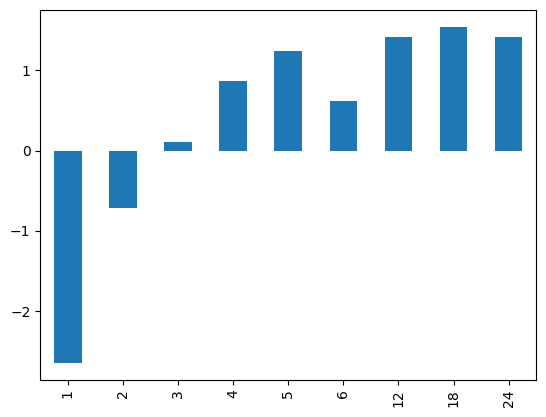

In [61]:
strat_1_sr.plot(kind="bar")

As we saw in the lectures, we observe reversal at lower granularities (4 hours and 8 hours) but momentum
at higher granularities (12 hours and higher).

In [63]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('A')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_annual_sr = get_strat_1_annual_sr(strat_1_ret)
strat_1_annual_sr

/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1074/1534691042.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_resample = strat_1_ret.resample('A')


,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-0.741792,6.989257,1.976651,11.511091,6.727520,7.521979,9.801668,5.197591,3.310282


<Axes: >

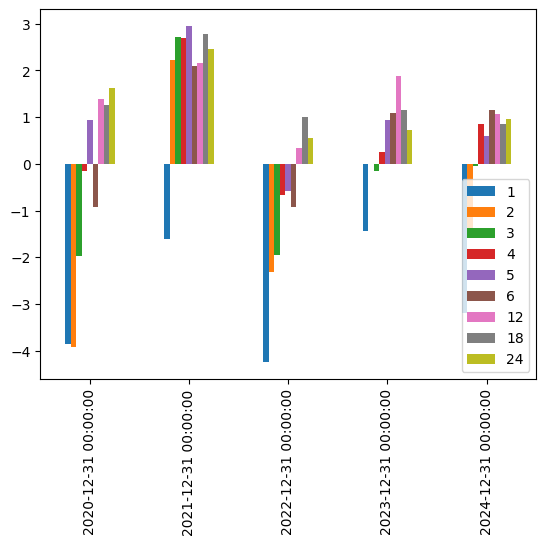

In [66]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_annual_sr.iloc[:-1].plot(kind='bar')

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.544282) prior to
transaction costs.

# TO DO: Incorporate transaction costs for strategy 1

In [37]:
import numpy as np

strat_1_sr_12hr = strat_1_ret_12hr.mean() / strat_1_ret_12hr.std() * np.sqrt(365 * 24 / 4)
strat_1_sr_12hr

0.10939246057317681

In [42]:
strat_1_sr_12hr_per_year = strat_1_ret_12hr.resample('A').mean() / strat_1_ret_12hr.resample('A').std() * np.sqrt(365 * 24 / 4)
strat_1_sr_12hr_per_year

/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1074/274321305.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  strat_1_sr_12hr_per_year = strat_1_ret_12hr.resample('A').mean() / strat_1_ret_12hr.resample('A').std() * np.sqrt(365 * 24 / 4)


2020-12-31   -1.972403
2021-12-31    2.724654
2022-12-31   -1.958102
2023-12-31   -0.153086
2024-12-31   -0.043546
2025-12-31    1.976651
Freq: YE-DEC, dtype: float64

<Axes: >

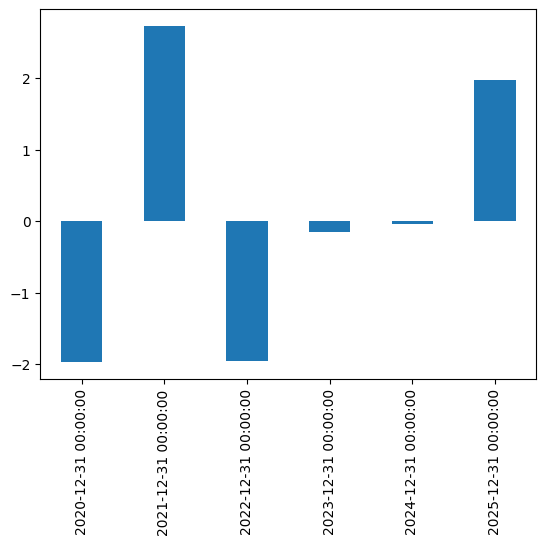

In [43]:
strat_1_sr_12hr_per_year.plot(kind='bar')

### Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

In [27]:
# Similarly to strategy 1, long high-performing coins based on average 
# returns and short low-performing coins averaged over different intervals
# but only do this for the top 2 and bottom 2 coins.

### Strategy 3: Testing With The Most Recent Interval Removed

In [28]:
# Similar to strategy 1: difference is to not include most recent 
# period in rolling window.